In [1]:
import functools
import os
import re
import shutil
import time
from configparser import ConfigParser


In [2]:
import sys
sys.path.append("/home/huiwu1/src/dl_solutions-kfb")
#/home/huiwu1/src/dl_solutions-kfb/third_lib/public_lib/Kfb
import cv2
import glob2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from lxml import etree
from matplotlib import patches

from third_lib.public_lib.Kfb import DBParser
from third_lib.public_lib.data import anchor

from TCT_det.data import cache


/home/huiwu1/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
config = ConfigParser()
config.read(r'./TCT_det/config/config.ini')
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'
#cache.display_tfrecord(r'G:\data\TCT\data\train_v20_ms.tfrecord', config)

In [4]:
from third_lib.public_lib.Kfb import kfbResaver, kfbReader
from third_lib.public_lib.Kfb.kfbReader import reader
src_path = "/home/huiwu1/src/TCT/ASC-H/2018-04-21 02_50_19.kfb"
dst_path = "/home/huiwu1/src/dl_solutions-kfb/2018-04-21 02_50_19.tif"
scale = 20
print("scale = {}")
#kfbResaver.toTiff(src_path, dst_path, scale)

r = reader()
r.ReadInfo(src_path, scale)


scale = {}


34030
32825
(1024, 1024, 3)


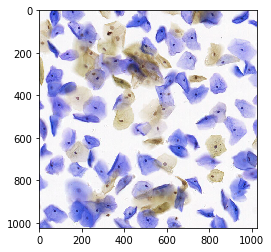

In [5]:
#objcoord, objcls = parse_db(kfbpath.replace('.kfb', '.db'), mapper)

kfb_width = r.getWidth()
kfb_height = r.getHeight()
print(kfb_width)
print(kfb_height)

#x, y, w, h = 16384, 16384, 1024, 1024
x, y, w, h = 10000, 10000, 1024, 1024
img = r.ReadRoi(x, y, w, h, scale)
#tif.save(img, photometric='rgb', contiguous=True)
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
print(img.shape)
plt.figure("dog")
plt.imshow(img)
plt.show()

In [10]:
db_path = "/home/huiwu1/src/TCT/ASC-H/2018-04-21 02_50_19.db"
method = 2
data = DBParser.ReadDB(db_path, method)
print("data = {}".format(data))  

#mapper = {}
#objcoord, objcls = cache.parse_db(db_path, mapper)


OperationalError: no such table: Annotations